# 1.Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Load datasets

In [ ]:
link_drive = '//content/drive/MyDrive/PHAN MEM/COLAB GOOGLE/ANACONDA LAB/JUPYTER LAB/Academy Learning/MCI _Python _level 2/Code by Academy/Final Exam/online_retail.xlsx'
data = pd.DataFrame([])
sheets = ['Year 2009-2010', 'Year 2010-2011']

for s in sheets:
  data = pd.concat([data, pd.read_excel(link_drive, sheet_name=s)], ignore_index=True)
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# For for multi-sheet file, insert for loop
df = pd.ExcelFile(link_drive)
df.sheet_names

['Year 2009-2010', 'Year 2010-2011']

In [ ]:
# QUESTION 01: How many customers are there in the dataset?
data['Customer ID'].nunique()

5942

In [ ]:
# QUESTION 02: Describe the dataset with the necessary information?
data.describe()   # Only runs on numeric column data! Not for caterogy

'''Min and Max are far apart, the possibility has outliers'''
'''Customers ID is wrong format'''
'''Min Quantity is negative'''

'Min Quantity is negative'

In [ ]:
# Load caterogy data
data[['Country', 'Description']].describe()

,Country,Description
count,1067371,1062989
unique,43,5698
top,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,981330,5918


In [ ]:
'''Show Price is negative'''
data[data['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
data[data['Quantity']<0]
'''Line 1067002 with StockCode "M", we delete it'''

'Line 1067002 with StockCode "M", we delete it'

In [ ]:
# QUESTION 03: Is there ant abnormal type for each feature?
# QUESTION 04: How many missing values are there in each feature?
data.info()
'''1067371 records, so columns with missing values will have fewer records'''
'''ID data is usually in Interger or string format.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


'ID data is usually in Interger or string format.'

In [ ]:
# % missing values in each column
data.isna().sum()/len(data)

Invoice        0.000000
StockCode      0.000000
Description    0.004105
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.227669
Country        0.000000
dtype: float64

In [ ]:
# QUESTION 05: How many unique values are there in each feature?
data.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

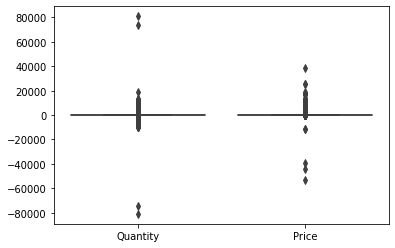

In [ ]:
# QUESTION 06: Are there any outliers in each feature?
'''Draw Boxpiplot and determine outliers using IQR method'''

sns.boxplot(data=data[['Quantity', 'Price']])

# 3.Data cleaning and preprocessing

In [ ]:
# QUESTION 01: Remove the outliers if any

# Calculate IQR for Quantity
Q3 = data['Quantity'].quantile(0.75)
Q1 = data['Quantity'].quantile(0.25)
IQR = Q3 - Q1

Quant_upper_limit = Q3 + 1.5*IQR
Quant_lower_limit = Q1 - 1.5*IQR

Quant_lower_limit, Quant_upper_limit

(-12.5, 23.5)

In [ ]:
# Return the exception value to IQR limit
data['Quantity_RO'] = pd.DataFrame(np.where(data['Quantity'] > Quant_upper_limit, Quant_upper_limit,
                                            (np.where(data['Quantity'] < Quant_lower_limit, Quant_lower_limit,
                                                      data['Quantity']))))
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_RO
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5


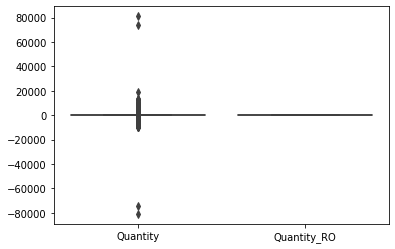

In [ ]:
sns.boxplot(data=data[['Quantity', 'Quantity_RO']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


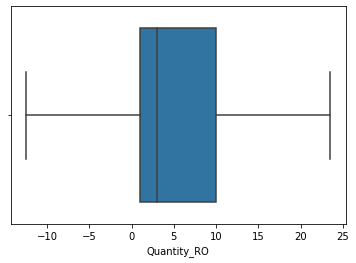

In [ ]:
sns.boxplot(data['Quantity_RO'])

In [ ]:
# Similar to Price data

In [ ]:
# QUESTION 02: Remove the missing values if any

data[data['Customer ID'].isna()]
'''Customer ID non null, Description non null'''

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_RO
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom,-12.5
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom,-12.5
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom,-12.5
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom,-12.5
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom,1.0
...,...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,5.0
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,4.0
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,1.0
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,1.0


In [63]:
# Remove the Customer ID missing values
data_nonna = data[data['Customer ID'].notna()] 

In [65]:
# Check the Customer ID missing values affter remove
data_nonna[data_nonna['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_RO
